In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [508]:
fraud = pd.read_csv('Fraud Detection Dataset.csv')

In [509]:
fraud.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [510]:
fraud.shape

(51000, 12)

In [511]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [512]:
fraud.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [513]:
fraud.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

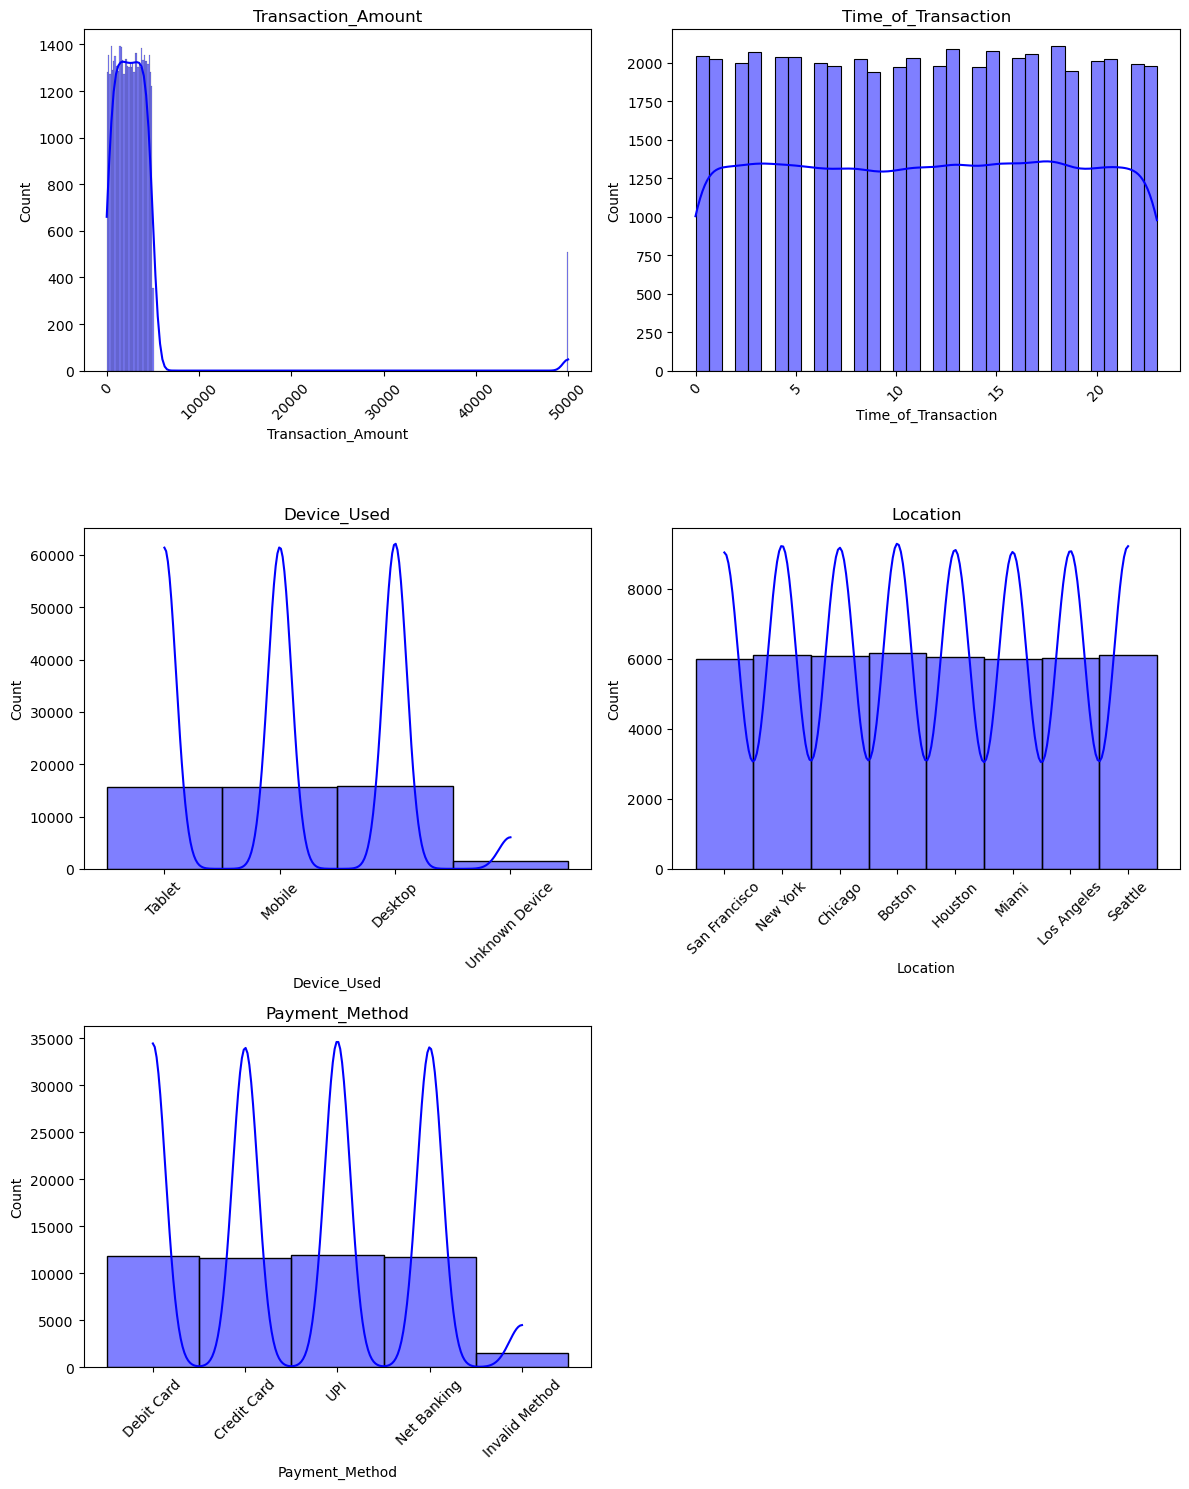

In [514]:
# Columns with missing values
missing_cols = [col for col in fraud.columns if fraud[col].isnull().sum() > 0]

# Set rows and columns
n_cols = 2  # Har row mein 2 graphs honge
n_rows = math.ceil(len(missing_cols) / n_cols)  # Total rows calculate karni hain

# Increase figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Ensure axes is always iterable
axes = np.array(axes).reshape(-1)  # Flatten if multiple rows

# Plot histograms
for ax, col in zip(axes, missing_cols):
    sns.histplot(fraud[col], kde=True, ax=ax, color='blue')
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for each subplot

# Hide any extra empty subplots
for i in range(len(missing_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
fig.tight_layout()
plt.show()


In [515]:
for col in fraud.columns:
    if fraud[col].dtype == 'object':
        fraud[col] = fraud[col].fillna('unknown')
    else:
        fraud[col] = fraud[col].fillna(fraud[col].mean())

In [516]:
fraud.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [517]:
fraud.duplicated().sum()

881

In [518]:
print("Unique data of Transaction Id:", len(fraud['Transaction_ID'].unique()))
print("Unique data of User Id:", len(fraud['User_ID'].unique()))

Unique data of Transaction Id: 50000
Unique data of User Id: 4000


In [519]:
# Transaction Id is not important so we remove this dataframe_columns
fraud.drop(['Transaction_ID'], axis=1, inplace=True)

In [520]:
fraud

,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,1860,2395.02,ATM Withdrawal,11.4884,Mobile,unknown,3,115,9,unknown,0
3,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...
50995,2339,3112.51,Bill Payment,15.0000,Mobile,New York,0,7,8,Debit Card,0
50996,2152,2897.15,Online Purchase,3.0000,Mobile,Miami,1,75,11,Net Banking,1
50997,3345,2204.43,POS Payment,18.0000,Mobile,San Francisco,3,73,5,Credit Card,0
50998,1518,4787.17,POS Payment,19.0000,Tablet,New York,2,108,14,Net Banking,0


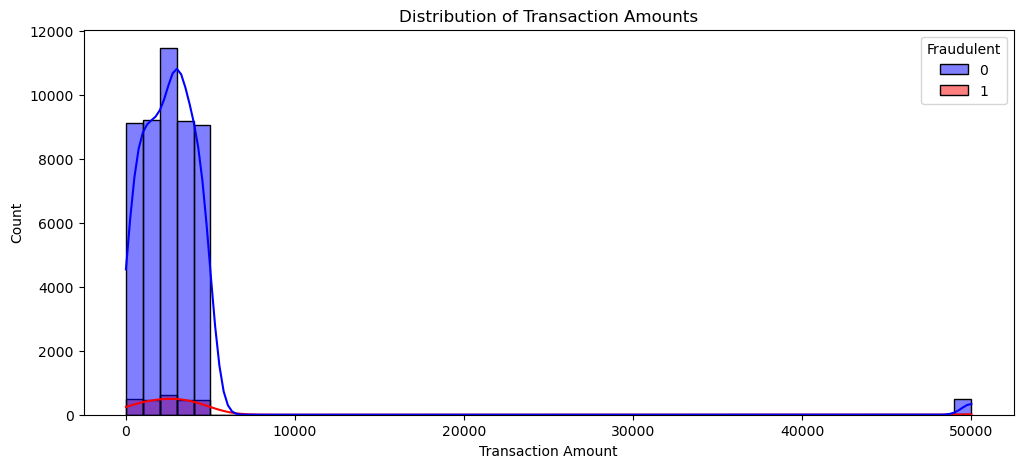

In [521]:
plt.figure(figsize=(12, 5))
sns.histplot(data=fraud, x='Transaction_Amount', bins=50, kde=True, hue='Fraudulent', palette={0: 'blue', 1: 'red'})
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

In [522]:
num_cols = fraud.select_dtypes(include = ['int64','float64']).drop(columns = ['User_ID']).columns
cat_cols = fraud.select_dtypes(exclude = ['int64','float64'])

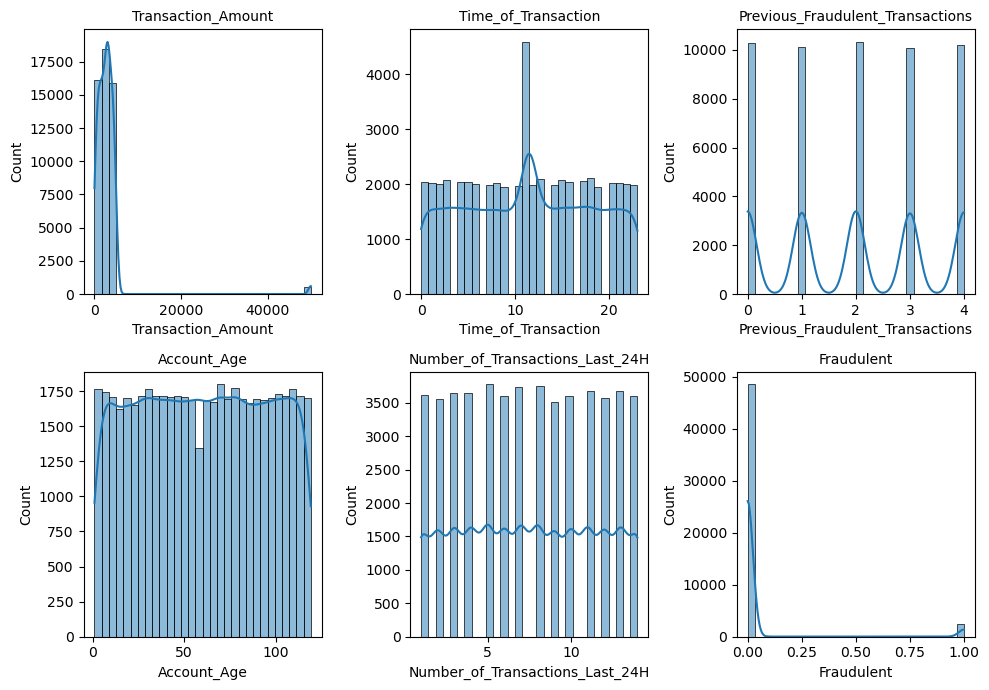

In [523]:

f, ax = plt.subplots(2,3, figsize=(10,7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = fraud, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 10)
    
plt.tight_layout()
plt.show()

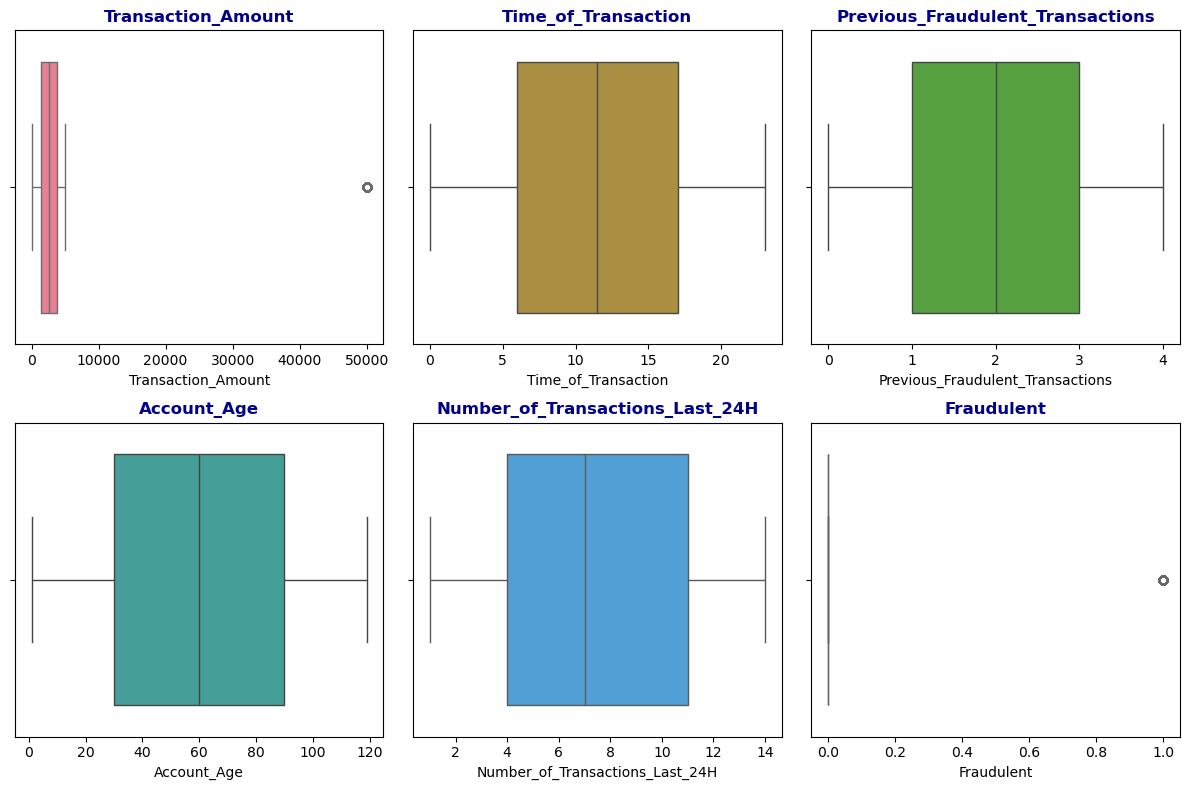

In [524]:
palette = sns.color_palette("husl", len(num_cols))  

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()  

for index, cols in enumerate(num_cols):  
    sns.boxplot(data=fraud, x=cols, ax=ax[index], color=palette[index])  
    ax[index].set_title(cols, fontsize=12, fontweight="bold", color="darkblue")

plt.tight_layout()
plt.show()

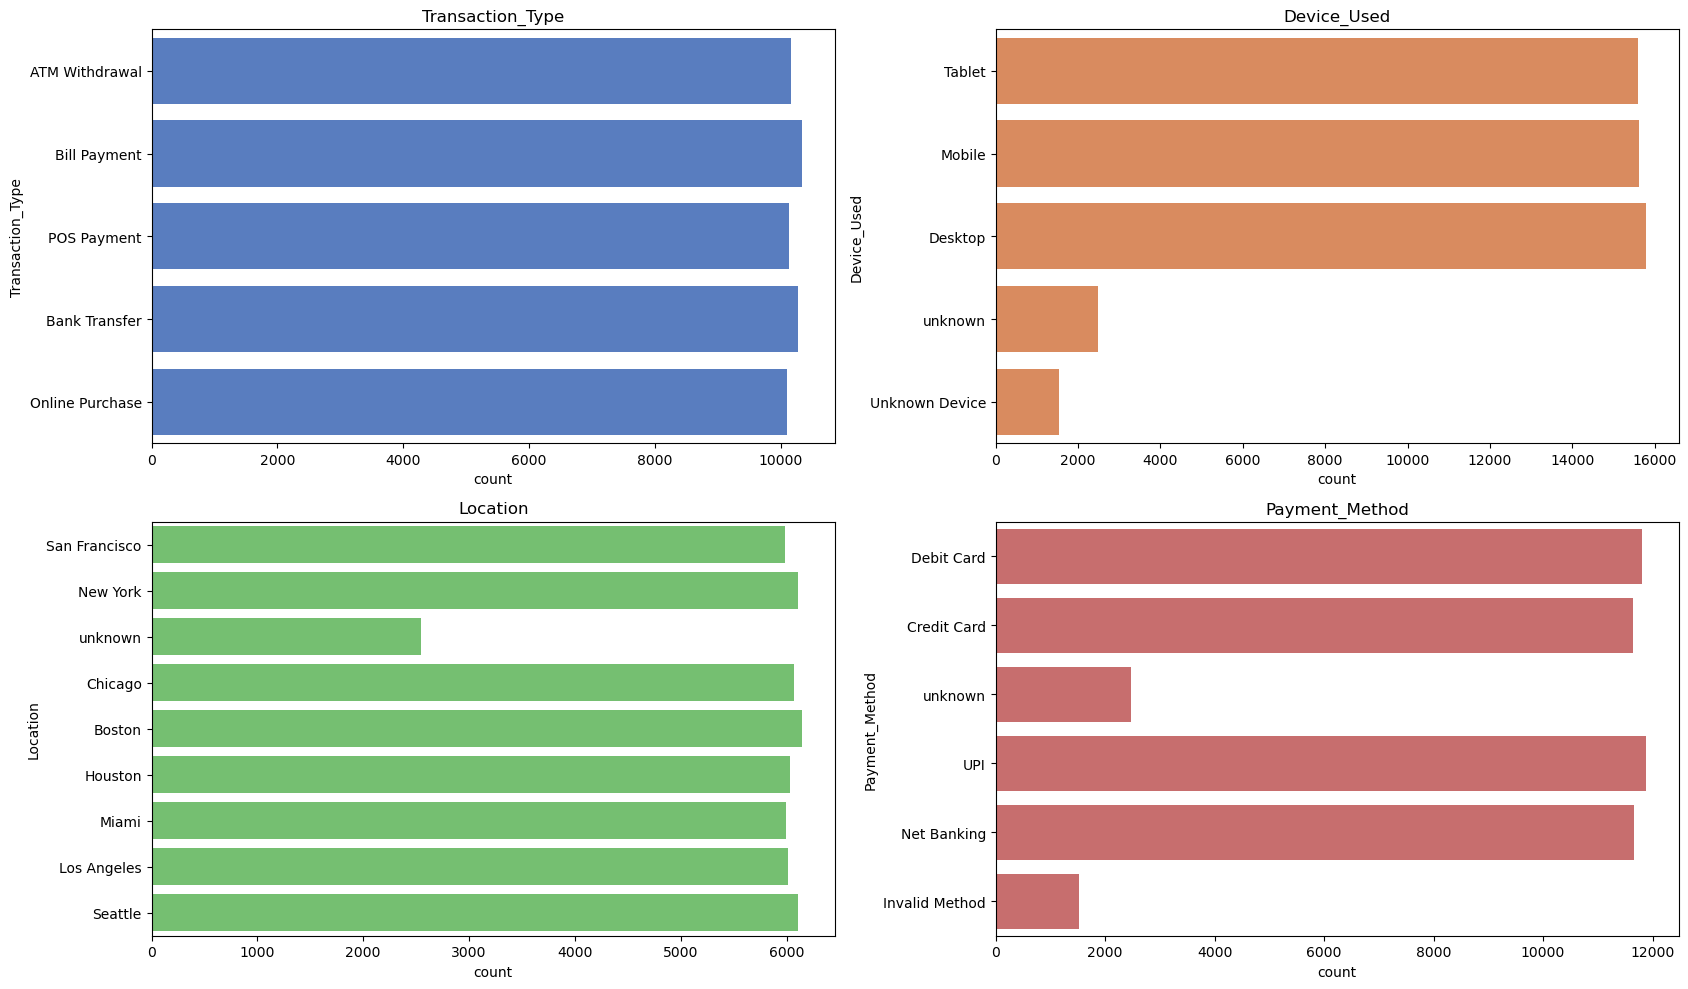

In [525]:
palette = sns.color_palette("muted", len(num_cols))  

f, ax = plt.subplots(2,2 , figsize=(17,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data=fraud, y= cols , ax= ax[index], color=palette[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

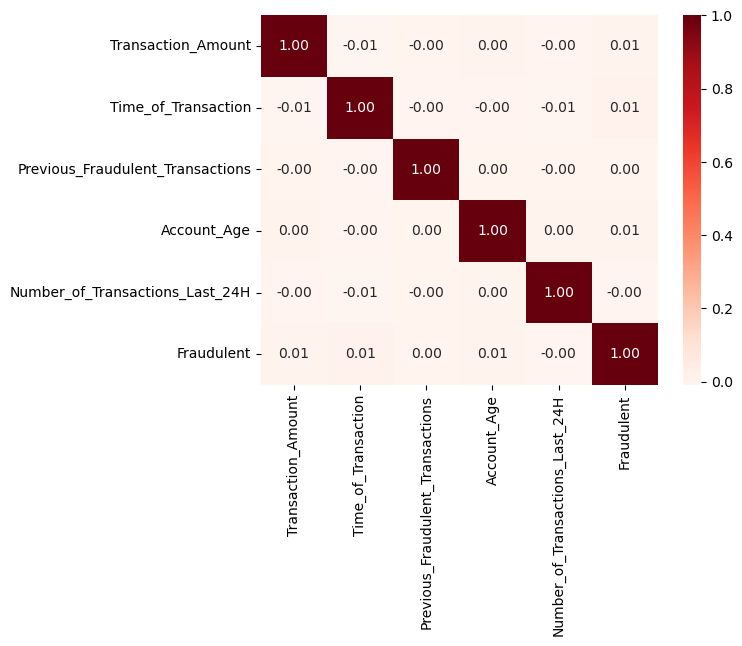

In [526]:
sns.heatmap(fraud[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

In [571]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_auc_score

In [528]:
fraud = fraud.drop(columns=['User_ID', 'Time_of_Transaction'])


In [529]:
cat_cols = fraud.select_dtypes(include = ['object']).columns

In [530]:
label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    fraud[col] = label_encoder.fit_transform(fraud[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: Transaction_Type
ATM Withdrawal -> 0
Bank Transfer -> 1
Bill Payment -> 2
Online Purchase -> 3
POS Payment -> 4

Column: Device_Used
Desktop -> 0
Mobile -> 1
Tablet -> 2
Unknown Device -> 3
unknown -> 4

Column: Location
Boston -> 0
Chicago -> 1
Houston -> 2
Los Angeles -> 3
Miami -> 4
New York -> 5
San Francisco -> 6
Seattle -> 7
unknown -> 8

Column: Payment_Method
Credit Card -> 0
Debit Card -> 1
Invalid Method -> 2
Net Banking -> 3
UPI -> 4
unknown -> 5



In [531]:
fraud = fraud.apply(pd.to_numeric, errors='coerce')


In [532]:
x = fraud.drop(columns=['Fraudulent']) 
y = fraud['Fraudulent'] 

In [533]:
x_train, x_test, y_train, y_test =train_test_split(x, y , random_state = 42, test_size= 0.2)

In [534]:
lgr = LogisticRegression()
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
dct = DecisionTreeClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

models = [lgr, rfc, abc,dct, gbc]

names = ["LogisticRegression","Random Forest", "Ada Boost","DecisionTree",
        "Gradient Boostng",]

LogisticRegression accuracy: 0.9498039215686275
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



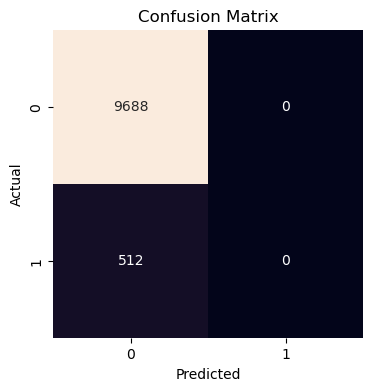

--------------------------------------------------
Random Forest accuracy: 0.9520588235294117
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9688
           1       1.00      0.04      0.09       512

    accuracy                           0.95     10200
   macro avg       0.98      0.52      0.53     10200
weighted avg       0.95      0.95      0.93     10200



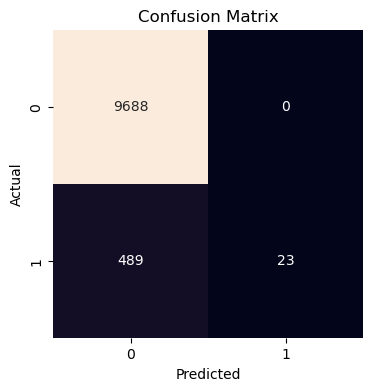

--------------------------------------------------
Ada Boost accuracy: 0.9497058823529412
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



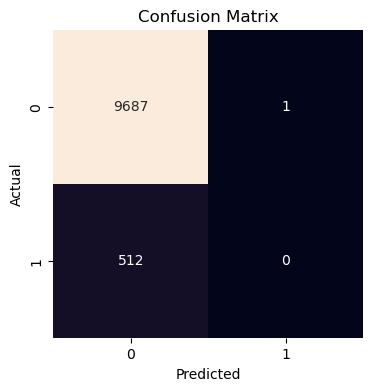

--------------------------------------------------
DecisionTree accuracy: 0.8961764705882352
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9688
           1       0.09      0.11      0.10       512

    accuracy                           0.90     10200
   macro avg       0.52      0.52      0.52     10200
weighted avg       0.91      0.90      0.90     10200



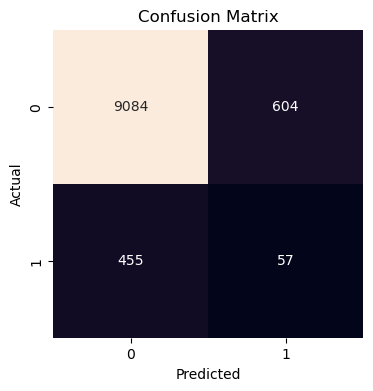

--------------------------------------------------
Gradient Boostng accuracy: 0.9496078431372549
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



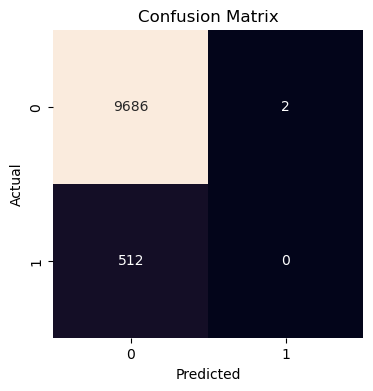

--------------------------------------------------


In [535]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #pred = label_encoder.inverse_transform(pred)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    index += 1

In [536]:
print(len(names), len(ac))


5 5


In [537]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,LogisticRegression,94.980392
1,Random Forest,95.205882
2,Ada Boost,94.970588
3,DecisionTree,89.617647
4,Gradient Boostng,94.960784


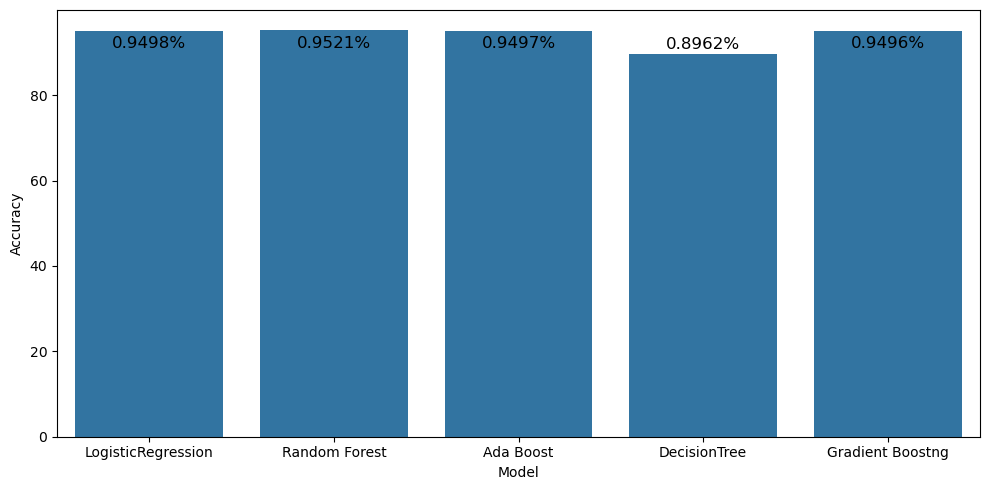

In [569]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 90, f"{value:.4f}%", ha='center', fontsize=12)
    
plt.tight_layout()
plt.show() 